<font size = 4> <b>G2M insight for Cab Investment firm </b> </font>

<b>Cabinvest</b>

Cabinvest is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<b>Project delivery:</b>

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

<b> GUIDE </b><br>
You should fully investigate and understand each data set.

Review the Source Documentation<br>
Understand the field names and data types<br>
Identify relationships across the files<br>
Field/feature transformations<br>
Determine which files should be joined versus which ones should be appended<br>
Create master data and explain the relationship<br>
Identify and remove duplicates<br>
Perform other analysis like NA value and outlier detection<br>

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<b>List the CSV files in current directory</b>

In [2]:
files = [f for f in os.listdir(os.curdir) if os.path.isfile(f)]
files

['Cab_Data.csv',
 'City.csv',
 'Customer_ID.csv',
 'README.md',
 'Transaction_ID.csv',
 'Untitled.ipynb']

<b> Read the CSV files listed </b>

In [3]:
cab_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
cust_df = pd.read_csv("Customer_ID.csv")
trans_df = pd.read_csv("Transaction_ID.csv")

<b>Cab Data</b> <i> Exploration </i>

In [4]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [35]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [11]:
cab_df.shape

(359392, 7)

In [48]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [25]:
cab_df.isnull().values.any()

False

In [26]:
cab_df.isnull().sum().sum()

0

In [32]:
cab_df['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [33]:
cab_df['City'].value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [22]:
cab_df['City'].nunique()

19

<b>City Data</b> <i> Exploration </i>

In [27]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [36]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [29]:
city_df.shape

(20, 3)

In [45]:
city_df['City'].value_counts()

City
NEW YORK NY         1
CHICAGO IL          1
NASHVILLE TN        1
WASHINGTON DC       1
PITTSBURGH PA       1
SACRAMENTO CA       1
SAN FRANCISCO CA    1
TUCSON AZ           1
SEATTLE WA          1
AUSTIN TX           1
DENVER CO           1
ATLANTA GA          1
DALLAS TX           1
PHOENIX AZ          1
SAN DIEGO CA        1
ORANGE COUNTY       1
SILICON VALLEY      1
MIAMI FL            1
LOS ANGELES CA      1
BOSTON MA           1
Name: count, dtype: int64

In [30]:
city_df.isnull().values.any()

False

In [31]:
city_df.isnull().sum().sum()

0

In [21]:
city_df['City'].nunique()

20

<b>Customer ID Data</b> <i> Exploration </i>

In [49]:
cust_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [50]:
cust_df.shape

(49171, 4)

In [52]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [53]:
cust_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [54]:
cust_df.isnull().values.any()

False

In [55]:
cust_df.isnull().sum().sum()

0

<b>Transaction ID Data</b> <i> Exploration </i>

In [56]:
trans_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [57]:
trans_df.shape

(440098, 3)

In [58]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [59]:
trans_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [60]:
trans_df.isnull().values.any()

False

In [61]:
trans_df.isnull().sum().sum()

0

In [5]:
trans_df['Payment_Mode'].value_counts()

Payment_Mode
Card    263991
Cash    176107
Name: count, dtype: int64

<b>Merge Dataframes</b>

In [6]:
cust_trans_df = pd.merge(cust_df, trans_df, on='Customer ID')

In [7]:
cust_trans_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [23]:
cab_city_df = pd.merge(cab_df, city_df, on='City')

In [24]:
cab_city_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


In [25]:
cab_city_df.isnull().values.any()

False

In [26]:
cab_city_df.isnull().sum().sum()

0

In [29]:
cab_city_df.duplicated().value_counts()

False    359392
Name: count, dtype: int64

In [40]:
master_df = pd.merge(cab_city_df, cust_trans_df, on='Transaction ID')

In [41]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card


In [32]:
master_df.shape

(359392, 14)

In [34]:
master_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Customer ID',
       'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode'],
      dtype='object')

In [42]:
master_df['Date of Travel'] = pd.to_datetime(master_df['Date of Travel'], origin='1899-12-30', unit='D')

In [43]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Payment_Mode        359392 no

In [44]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card


In [46]:
master_df['Year'] = master_df['Date of Travel'].dt.year

In [48]:
master_df['Month'] = master_df['Date of Travel'].dt.month

In [60]:
master_df['State'] = master_df['City'].str.extract(r'\b([A-Z]{2})\b')

In [61]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Month,State
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,2016,1,GA
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,2016,1,GA
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,2016,1,GA
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,2016,1,GA
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,2016,1,GA


In [66]:
master_df['Year'].value_counts()

Year
2017    128510
2018    123563
2016    107319
Name: count, dtype: int64

In [67]:
master_df['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [68]:
master_df['Gender'].value_counts()

Gender
Male      205912
Female    153480
Name: count, dtype: int64

In [62]:
master_df['State'].value_counts().sort_values()

State
PA     1313
TN     3010
CO     3825
AZ     3995
FL     6454
GA     7557
WA     7997
TX    11913
MA    29692
DC    43737
IL    56625
CA    70888
NY    99885
Name: count, dtype: int64

In [74]:
master_df.shape

(359392, 17)

<font size = '4'><b> Exploratory Data Analysis (EDA) </b> <i> using Master Dataframe </i></font>

In [76]:
master_df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Month,State
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,2016,1,GA
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,2016,1,GA
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,2016,1,GA


In [78]:
master_df['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

Add a column into the Dataframe

In [79]:
master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']

In [81]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Month,State,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,2016,1,GA,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,2016,1,GA,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,2016,1,GA,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,2016,1,GA,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,2016,1,GA,16.844


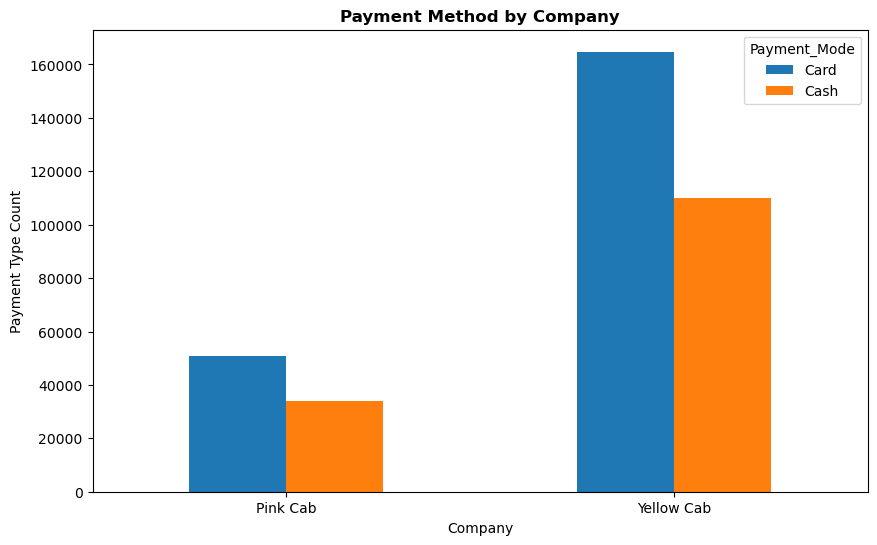

In [94]:
payment_method = master_df.groupby(['Company','Payment_Mode'])['Payment_Mode'].count().unstack()
fig, ax = plt.subplots(figsize=(10, 6))
payment_method.plot.bar(ax=ax)
plt.title("Payment Method by Company", weight='bold')
plt.ylabel("Payment Type Count")
plt.xlabel("Company")
plt.xticks(rotation=0)
plt.show()
